# Air Quality and Data Analysis
###### By Eleanor Downer

## Abstract

The objective of this project was to produce a heatmap of correlation coefficients between particulate matter for five air quality stations in Beijing, as well as boxplots of the particulate matter values at those stations.

Particulate matter is a term used to describe the sum of liquid droplets and solid particles suspended in the atmosphere.  It is believed that particulate matte can be harmful if inhaled, and is a growing concern for cities.

The challenge of producing the graphs was solved by a piece of code written in the programming language Python, using modules Pandas, matplotlib, and Seaborn.

## Introduction

The objective of this project was to produce a heatmap of correlation coefficients between particulate matter for five air quality stations in Beijing, as well as boxplots of the particulate matter values at those stations.

Particulate matter is the sum of solid and liquid particles suspended in the atmosphere. It consists of primary and secondary components and the particles can come from either human-made or naturally occurring sources [1]. PM10 is particulate matter with diameters of 10 micrometres and smaller; and PM2.5 is particulate matter with diameters of 2.5 micrometres and smaller [2]. This project will only be looking into PM2.5 values, not PM10. The importance of measuring PM2.5 values comes from the health consequences of being exposed to it. The World Health Organization has stated that exposure to PM2.5 can increase the risk of respiratory illness and heart disease in a population [3].

The data for this project has been sourced from "Air pollution and meteorological data in Beijing 2017-2018" from The Harvard Dataverse:

 - The Harvard Dataverse: https://dataverse.harvard.edu
 - Wang, Hongwei, 2019, "Air pollution and meteorological data in Beijing 2017-2018", https://doi.org/10.7910/DVN/USXCAK, Harvard Dataverse, V1
 - URL: https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/USXCAK

The recordings made include the hourly mean concentrations of six air pollutants including O3, SO2, NO2, PM2.5, PM10, and CO and were collected from 35 air quality monitoring stations in Beijing, from 01/01/2017 to 30/05/2018. The data was provided by the Ministry of Environmental Protection of China. This report will be using the PM2.5 data from only five of the 35 stations; Nansanhuan, Yizhuang, Yongdingmennei, Qianmen and Beibuxinqu.

The challenge of this project is to manipulate the data to extract the information required from the data frame, and to generate the correlation coefficient matrix (correlation coefficients are used to find the strength of a relationship between data. In this project, the relationship being measured is the PM2.5 values between the different stations). The final challenge is to produce a heatmap of these correlation coefficients, and as boxplots of the PM2.5 values at each station. 

The programming language Python, as well as the modules Pandas, matplotlib, and Seaborn are all used to produce a piece of code that will be able to fulfil all these challenges. Pandas is an open source data analysis and manipulation tool [5]; matplotlib is a tool for creating static, animated, and interactive visualizations [6]; Seaborn is a data visualization library based on matplotlib, it provides a high-level interface for creating statistical graphs [7].

## Code

In [2]:
# Import Pandas
import pandas as pd
# Use the internal function in Pandas 'pd.read_csv'
# Read data from file 'beijing_17_18_aq.csv'
data = pd.read_csv("data/beijing_17_18_aq.csv")

# Create a seperate data frame to hold the data for the station 'Nansanhuan'
data_nan= data[data['stationId'] == 'nansanhuan_aq']
# Use the function '.rename' to rename column 'PM2.5' to 'Nansanhuan'
# This will allow the data frames to be merged later without issues
data_nan=data_nan.rename(columns={"PM2.5": "Nansanhuan"})
# Reduce the number of columns to just 'utc_time' and the PM2.5 value
# This is because the other data is not needed
data_nan = data_nan[['utc_time', 'Nansanhuan']]
# Set the index to 'utc_time' using the command '.set_index()'
data_nan=data_nan.set_index('utc_time')

# Repeat the above code for each station
# To produce five seperate data frames for each station
# Yizhuang
data_yiz = data[data['stationId'] == 'yizhuang_aq']
data_yiz=data_yiz.rename(columns={"PM2.5": "Yizhuang"})
data_yiz = data_yiz[['utc_time', 'Yizhuang']]
data_yiz = data_yiz.set_index('utc_time')
# Yongdingmennei
data_yong= data[data['stationId'] == 'yongdingmennei_aq']
data_yong=data_yong.rename(columns={"PM2.5": "Yongdingmennei"})
data_yong= data_yong[['utc_time', 'Yongdingmennei']]
data_yong=data_yong.set_index('utc_time')
# Qianmen
data_qia=data[data['stationId'] == 'qianmen_aq']
data_qia=data_qia.rename(columns={"PM2.5": "Qianmen"})
data_qia=data_qia[['utc_time', 'Qianmen']]
data_qia=data_qia.set_index('utc_time')
#Beibuxinqu
data_beib=data[data['stationId'] == 'beibuxinqu_aq']
data_beib=data_beib.rename(columns={"PM2.5": "Beibuxinqu"})
data_beib=data_beib[['utc_time', 'Beibuxinqu']]
data_beib=data_beib.set_index('utc_time')

# Merge the five data frames together, using the function 'pd.merge()'
# The use of brackets allows all the data frames to be merged with one line of code
# A new data frame is produced with the PM2.5 values for each station and has the index of 'utc_time'
combined_df=pd.merge(pd.merge(pd.merge(pd.merge(data_nan,data_yiz,on='utc_time'),data_yong,on='utc_time'),data_qia,on='utc_time'),data_beib,on='utc_time')

# Use the function '.head()' to preview the new data frame
combined_df.head()

,Nansanhuan,Yizhuang,Yongdingmennei,Qianmen,Beibuxinqu
utc_time,,,,,
01/01/2017 14:00,431.0,278.0,415.0,436.0,479.0
01/01/2017 15:00,426.0,298.0,409.0,443.0,481.0
01/01/2017 16:00,420.0,306.0,401.0,429.0,488.0
01/01/2017 17:00,417.0,306.0,407.0,448.0,487.0
01/01/2017 18:00,426.0,315.0,415.0,452.0,489.0


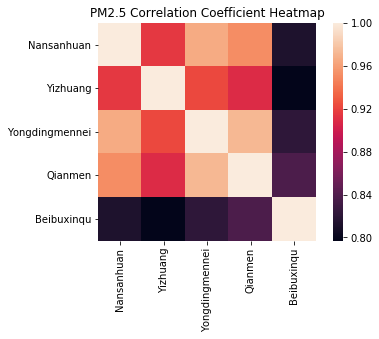

In [6]:
# Produce a correlation coefficient matrix of all the PM2.5 at the five different stations
# Using the internal function '.corr()' in Pandas
corr = combined_df[['Nansanhuan','Yizhuang','Yongdingmennei','Qianmen','Beibuxinqu']].corr()

# Import matplotlib
import matplotlib.pyplot as plt
# Import Seaborn (a plotting module used with Pandas)
import seaborn as sns

# Produce a heatmap of the correlation coefficient, using the Seaborn internal function '.heatmap'
# 'square=True' set the axes aspect to equal so each cell will be square-shaped
# 'xticklabels' and 'yticklabels' set the axes labels the station names
hm = sns.heatmap(corr, square =True, xticklabels=corr.columns, yticklabels=corr.columns)
# The two lines of code below are used to make the top and bottom rows square-shaped
# This had to be done manually due to a bug in matplotlib causing heatmaps top and bottom row being cut in half
bottom, top = hm.get_ylim()
hm.set_ylim(bottom + 0.5, top - 0.5)
# Title the heatmap
hm.set_title('PM2.5 Correlation Coefficient Heatmap')

# Show the plot
plt.show()

Text(0, 0.5, 'log of PM2.5 Values')

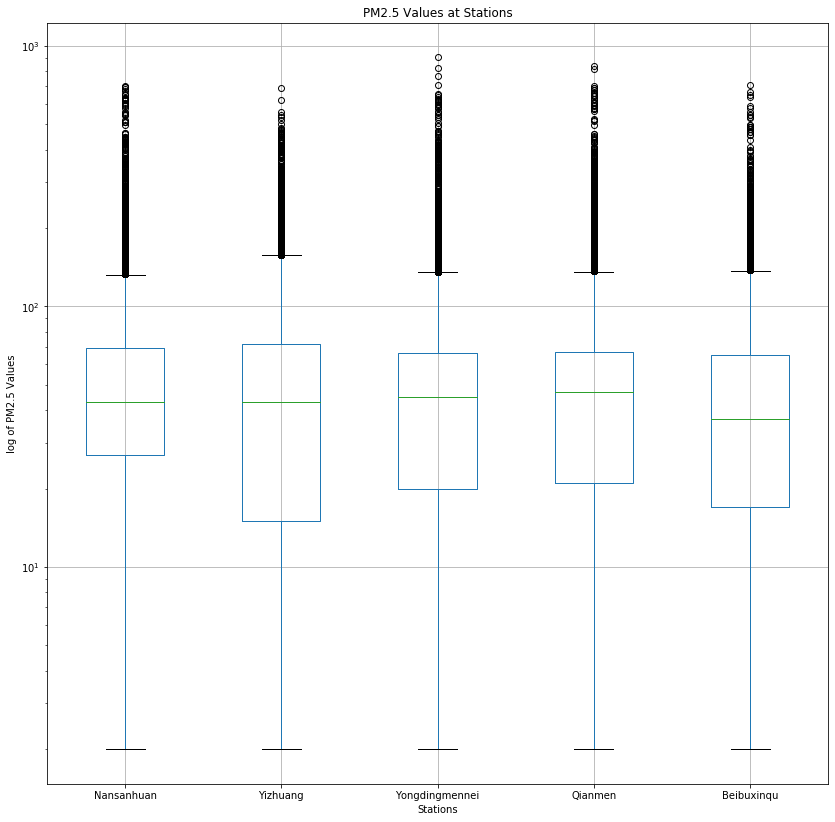

In [5]:
# Use the '.boxplot' function
# Produce a boxplot of the PM2.5 values at each station
boxplot = combined_df[['Nansanhuan','Yizhuang','Yongdingmennei','Qianmen','Beibuxinqu']].boxplot(column=['Nansanhuan','Yizhuang','Yongdingmennei','Qianmen', 'Beibuxinqu'], figsize=(14,14))

# Set y-axis to to log scale
boxplot.set_yscale('log')
# Give the boxplot a title
boxplot.set_title('PM2.5 Values at Stations')
# Label the x-axis
boxplot.set_xlabel('Stations')
#Label the y-axis
boxplot.set_ylabel('log of PM2.5 Values')

## Results

#### The Heatmap

A heatmap is a two-dimensional graphical representation of data; the values are contained in a matrix and their magnitudes are shown as colours [1]. The heatmap produced in this project shows the value of the correaltion coefficients of the average PM2.5 values  between the different stations as colours. The xand y axes are labelled with the station namesto indicate which two stations each cell coresponds too. 

Correlation coefficients are used to determine the strength of the relationship betweeen data. A correlation coefficient of -1.00 represents a perfect negative correlation, while a correlation of 1.00 represents a perfect positive correlation. A correlation of 0.0 signifies that there is no linear relationship between the variables.REFERENCE. The colour bar, next to the heatmap, shows that there are no values lower than ~0.80, therefore we know immediately that the stations PM2.5 values have a positive relationship with the rest. The different colours/shades of the cells gives us extra information on the correlation coefficients between the stations; the cells corresponding to Beibuxinqu coefficients are much darker than the rest of the grid, this indicates that the PM2.5 values at Beibuxinqu have the weakest positive relationship with the PM2.5 values at the rest of the stations.

The horizontal white line, showing a coefficient correlation of 1.00, is the value of the stations PM2.5 values against itself. This is what would be expected as the data is exactly the same and therefore would have a perfect positive relationship. This is useful as it reassures us that the correlation coefficient matrix and the heatmap were generated correctly.

A few improvements could be made to improve the heatmap.For example, a mask could be added to cover the repeated data; currently there are two corresponding cells for each combination of stations (excluding the combinations of a station against itself). This would improve the heatmap by reducing the amount of data displayed and therefore making it easier to interpret. There is an example below of what this would look like.

(5.0, 0.0)

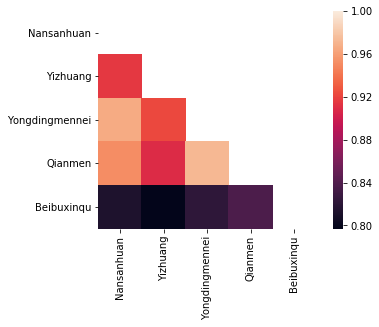

In [9]:
## Improvements 

#Import numpy
import numpy as np

# Generate a mask for the supper triangle of the heatmap
mask = np.triu(np.ones_like(corr,dtype=np.bool))

# Add the code'mask=mask' to the original code
hm_2 = sns.heatmap(corr, mask=mask, square =True, xticklabels=corr.columns, yticklabels=corr.columns)

# Making the top and bottom row cells square 
bottom, top = hm.get_ylim()
hm_2.set_ylim(bottom + 0.5, top - 0.5)

Another way the heatmap could be bettered is by adding the correlation coefficient values onto the squares. This would allow for more accurate readings of the heatmap. There is an example below on what this could look like, and the code that could be used.

(5.0, 0.0)

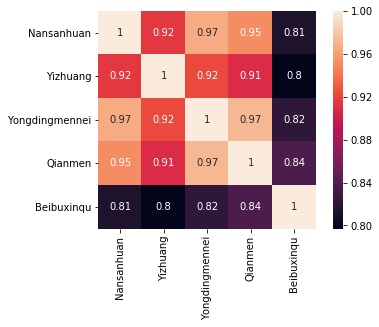

In [12]:
## Improvements

# Add 'annot=True' to the original code
hm_2 = sns.heatmap(corr, annot=True, square  =True, xticklabels=corr.columns, yticklabels=corr.columns)

# Making the top and bottom row cells square 
bottom, top = hm.get_ylim()
hm_2.set_ylim(bottom + 0.5, top - 0.5)

#### The Boxplot

A boxplot is a graph that is useful in visualizing the distribution of data, and is especially valuable when comparing the distributions between multiple datasets. Boxplots display the data based on a five-number summary: the minimum, the maximum, the median, the first quartile (Q1), and third quartile (Q3).

The figure produced in this project has five boxplots; one boxplot for the PM2.5 values at each of the five stations. The x-axis are the station names, and the y-axis is the log value of the PM2.5 data (a log scale has been used to allow for better interpretation of the values). 

The green line is the median; it is the middle value of the PM2.5 data for that station.
The blue line below it is the first quartile; the middle value between the smallest value and the median of the data.
The blue line above the median is the third quartile; the middle value between the median and the highest value of the data.
The box that these lines are part of represents the interquartile range; the 25th to the 75th percentile.
The black line at the end of the whiskers (blue vertical lines) represent the 'minimum' and the 'maximum'; the minimum is calculated by Q1-1.5*IQR and the maximum is calculated by Q3+1.5*IQR.
The black dots represent the outliers; outliers are the remaining 0.7% of the data.

#### Improvements

In some ways, the code is limited the amount of data it processes, one way to improve the code further would be to incorporate the data from all 35 stations. This would produce a larger heatmap with more information to interpret. However, to do this with the code used in this report would  be time consuming and therefore a different method may be better for this task.

Other improvements that could be made include the addition of other graphs visualise the PM2.5 data, for example, a scatter graph of each stations PM2.5 values against time for further comparison. This would require new code that this project doesn't touch upon.

#### The Data

The data used for this project was sourced from the Harvard Dataverse, a repository for research data. The author is Wang, Hongwei and it is affiliated with Shanghai Jia Tong University. There is no reason to believe the data is forged or inaccurate, as a credible university is responsible for it. However, as with any information taken from the internet there is a risk it is fake or inaccurate.

There are no restrictions on the data used, it is open source to use and available at The Harvard Dataverse for anyone to use. The code used in this project is my own and unrestricted for public use.


### References:

https://stackoverflow.com/questions/23668427/pandas-three-way-joining-multiple-dataframes-on-columns
https://seaborn.pydata.org/generated/seaborn.heatmap.html

[1] https://blog.quantinsti.com/creating-heatmap-using-python-seaborn/